# Reflection and Blogpost Writing

In [27]:
#Setup 
from dotenv import load_dotenv

import os

load_dotenv()
API_KEY = os.getenv("OPENAI_KEY")

In [28]:
llm_config = {"model": "gpt-3.5-turbo", "api_key": API_KEY}

## Task

In [29]:
task = '''
        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       '''


## Writer Agent

In [30]:
import autogen

writer = autogen.AssistantAgent(
    name="Writer",
    system_message="You are a writer. You write engaging and concise " 
        "blogpost (with title) on given topics. You must polish your "
        "writing based on the feedback you receive and give a refined "
        "version. Only return your final work without additional comments.",
    llm_config=llm_config,
)

In [31]:
reply = writer.generate_reply(messages=[{"content": task, "role": "user"}])

In [32]:
print(reply)

Title: Unleashing the Power of Deep Learning with DeepLearning.AI

Delve into the world of artificial intelligence with DeepLearning.AI! This online platform offers top-notch courses created by industry expert Andrew Ng to equip you with cutting-edge knowledge in deep learning. Whether you are a beginner or an experienced professional, DeepLearning.AI provides you with the tools and resources to thrive in this exciting field. From computer vision to natural language processing, the courses cover a wide range of topics to cater to your interests. Join the DeepLearning.AI community today and unlock your potential in the realm of deep learning!


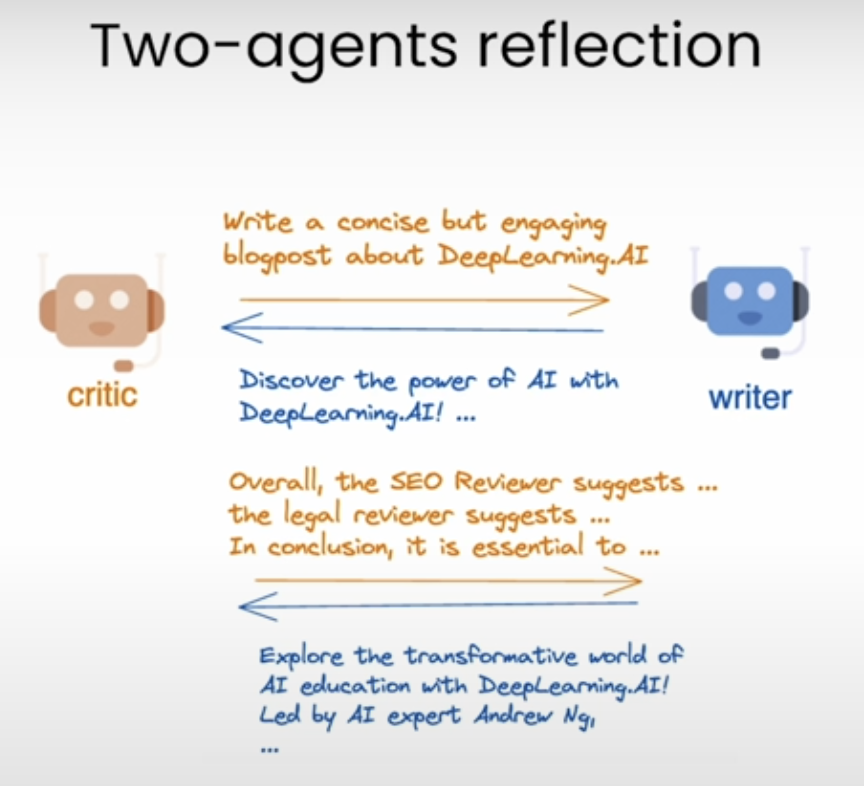

In [33]:
from IPython.display import Image
Image(filename='../assets/2_agent_reflection.png')

# Adding Reflection

Add another agent to reflect on the work and improve it. 

In [34]:
critic = autogen.AssistantAgent(
    name="Critic",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    llm_config=llm_config,
    system_message="You are a critic. You review the work of "
                "the writer and provide constructive "
                "feedback to help improve the quality of the content.",
)

In [35]:
res = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

Critic (to Writer):


        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

Title: Unleashing the Power of Deep Learning with DeepLearning.AI

Delve into the world of artificial intelligence with DeepLearning.AI! This online platform offers top-notch courses created by industry expert Andrew Ng to equip you with cutting-edge knowledge in deep learning. Whether you are a beginner or an experienced professional, DeepLearning.AI provides you with the tools and resources to thrive in this exciting field. From computer vision to natural language processing, the courses cover a wide range of topics to cater to your interests. Join the DeepLearning.AI community today and unlock your potential in the realm of deep learning!

--------------------------------------------------------------------------------
Critic (

## Nested Chat

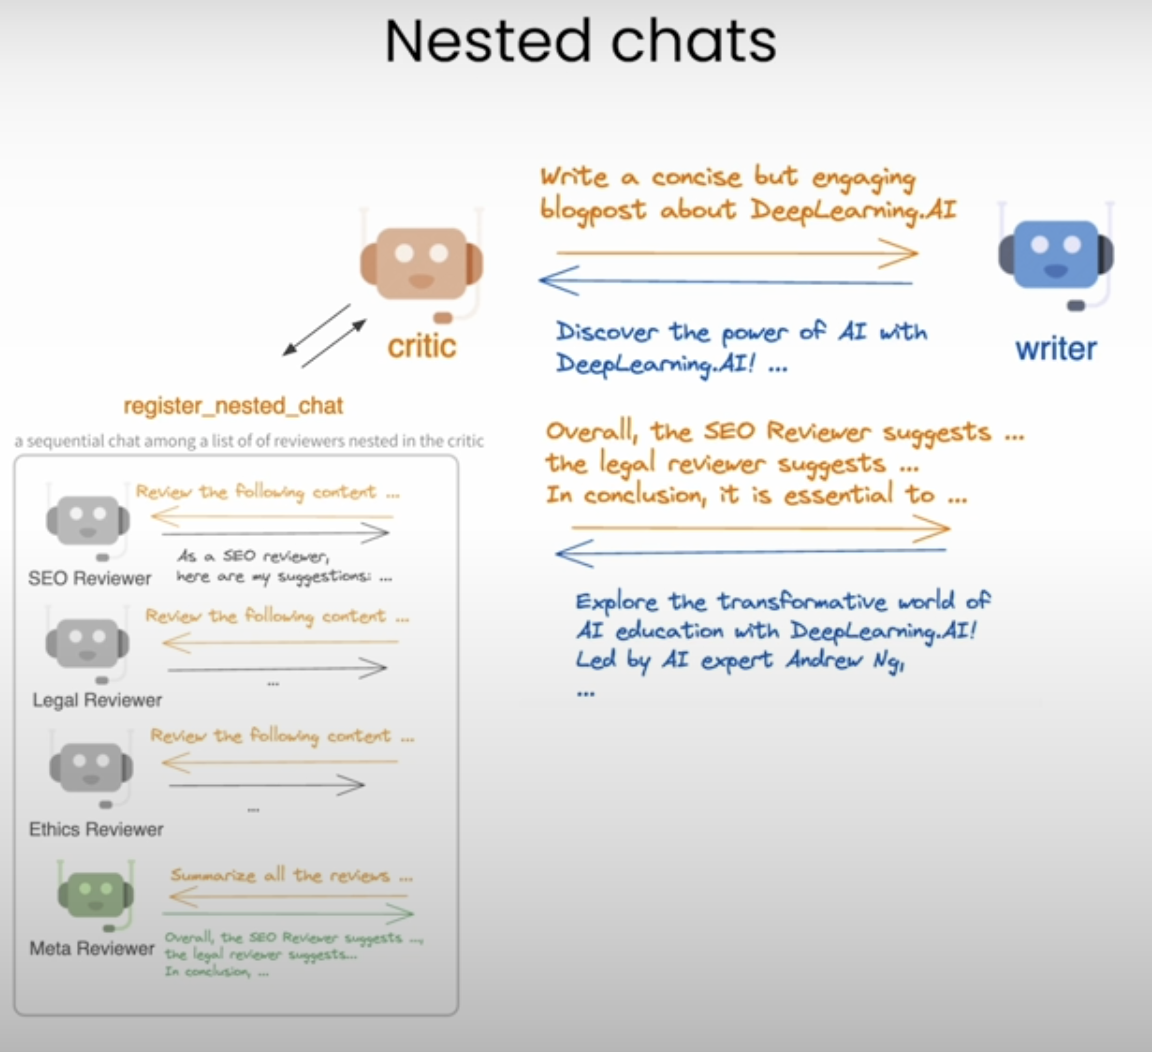

In [36]:
from IPython.display import Image
Image(filename='../assets/nested_chat.png')

In [37]:
SEO_reviewer = autogen.AssistantAgent(
    name="SEO Reviewer",
    llm_config=llm_config,
    system_message="You are an SEO reviewer, known for "
        "your ability to optimize content for search engines, "
        "ensuring that it ranks well and attracts organic traffic. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

In [38]:
legal_reviewer = autogen.AssistantAgent(
    name="Legal Reviewer",
    llm_config=llm_config,
    system_message="You are a legal reviewer, known for "
        "your ability to ensure that content is legally compliant "
        "and free from any potential legal issues. "
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

In [39]:
ethics_reviewer = autogen.AssistantAgent(
    name="Ethics Reviewer",
    llm_config=llm_config,
    system_message="You are an ethics reviewer, known for "
        "your ability to ensure that content is ethically sound "
        "and free from any potential ethical issues. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role. ",
)

In [40]:
meta_reviewer = autogen.AssistantAgent(
    name="Meta Reviewer",
    llm_config=llm_config,
    system_message="You are a meta reviewer, you aggragate and review "
    "the work of other reviewers and give a final suggestion on the content.",
)

## Orchestrate Nested Chats to solve the task

In [41]:
def reflection_message(recipient, messages, sender, config):
    return f'''Review the following content.
    \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''

review_chats = [
    {
     "recipient": SEO_reviewer, 
     "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}. Here Reviewer should be your role",},
     "max_turns": 1},
    {
    "recipient": legal_reviewer, "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}.",},
     "max_turns": 1},
    {"recipient": ethics_reviewer, "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'reviewer': '', 'review': ''}",},
     "max_turns": 1},
     {"recipient": meta_reviewer, 
      "message": "Aggregrate feedback from all reviewers and give final suggestions on the writing.", 
     "max_turns": 1},
]

In [42]:
critic.register_nested_chats(
    review_chats,
    trigger=writer,
)

In [43]:
res = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

Critic (to Writer):


        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

Title: Unleashing the Power of Deep Learning with DeepLearning.AI

Delve into the world of artificial intelligence with DeepLearning.AI! This online platform offers top-notch courses created by industry expert Andrew Ng to equip you with cutting-edge knowledge in deep learning. Whether you are a beginner or an experienced professional, DeepLearning.AI provides you with the tools and resources to thrive in this exciting field. From computer vision to natural language processing, the courses cover a wide range of topics to cater to your interests. Join the DeepLearning.AI community today and unlock your potential in the realm of deep learning!

--------------------------------------------------------------------------------

*******

In [44]:
print(res.summary)

Title: Master Deep Learning with Expert Courses by DeepLearning.AI - Enroll Today!

Unleash the potential of deep learning through structured courses offered by DeepLearning.AI. Dive into the expertise of industry leader Andrew Ng with our 'Deep Learning courses by DeepLearning.AI' tailored for all skill levels. Optimize your learning with practical insights spanning computer vision, natural language processing, and more. Our platform prioritizes transparency, accuracy, and user privacy, ensuring compliance with data protection laws. Join us to elevate your AI skills ethically and legally. Enroll today to access expert-led courses and propel your career in the exciting realm of deep learning!
